In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import interpolate 

import sympy

import surfinBH

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing surfinBH

In [2]:
#Pick the fit
fitOpt = list(surfinBH.fits_collection.keys())
print(fitOpt)

[surfinBH.fits_collection[fit].desc for fit in fitOpt]

['NRSur3dq8Remnant', 'surfinBH7dq2', 'NRSur7dq4Remnant']


['Fits for remnant mass, spin and kick veclocity for nonprecessing BBH systems. This model was called surfinBH3dq8 in the paper.',
 'Fits for remnant mass, spin and kick veclocity for generically precessing BBH systems.',
 'Fits for remnant mass, spin and kick veclocity for generically precessing BBH systems up to mass ratio 4.']

In [3]:
fit = surfinBH.LoadFits('NRSur7dq4Remnant')
help(fit)

Loaded NRSur7dq4Remnant fit.
Help on Fit7dq4 in module surfinBH._fit_evaluators.fit_7dq4 object:

class Fit7dq4(surfinBH.surfinBH.SurFinBH)
 |  Fit7dq4(name, load_nrsur=False)
 |  
 |  A class for the NRSur7dq4Remnant model presented in Varma et al.,
 |  arxiv:1905.09300, hereafter referred to as THE PAPER.
 |  
 |  This model predicts the final mass mf, final spin vector
 |  chif and final kick velocity vector vf, for the remnants of precessing
 |  binary black hole systems.  The fits are done using Gaussian Process
 |  Regression (GPR) and also provide an error estimate along with the fit
 |  value.
 |  
 |  This model has been trained in the parameter space:
 |      q <= 4, |chiA| <= 0.8, |chiB| <= 0.8
 |  
 |  However, it extrapolates reasonably to:
 |      q <= 6, |chiA| <= 1, |chiB| <= 1
 |  
 |  =========================================================================
 |  Usage:
 |  
 |  import surfinBH
 |  
 |  # Load the fit
 |  fit = surfinBH.LoadFits('NRSur7dq4Remnant')
 |  

In [148]:
fit = surfinBH.LoadFits('NRSur3dq8Remnant')
help(fit)

Loaded NRSur3dq8Remnant fit.
Help on Fit3dq8 in module surfinBH._fit_evaluators.fit_3dq8 object:

class Fit3dq8(surfinBH.surfinBH.SurFinBH)
 |  Fit3dq8(name)
 |  
 |  A class for the NRSur3dq8Remnant model presented in Varma et al.,
 |  arxiv:1809.09125. This model is referred to as surfinBH3dq8 in the paper.
 |  
 |  This model predicts the final mass mf, final
 |  spin chif and final kick velocity vf, for the remnants of nonprecessing
 |  binary black hole systems. The fits are done using Gaussian Process
 |  Regression (GPR) and also provide an error estimate along with the fit
 |  value.
 |  
 |  This model has been trained in the parameter space:
 |      q <= 8, |chiAz| <= 0.8, |chiBz| <= 0.8
 |  
 |  However, it extrapolates reasonably to:
 |      q <= 10, |chiAz| <= 1, |chiBz| <= 1
 |  
 |  =========================================================================
 |  Usage:
 |  
 |  import surfinBH
 |  
 |  # Load the fit
 |  fit = surfinBH.LoadFits('NRSur3dq8Remnant')
 |  
 |  

In [4]:
q = 1
chiA = [0.8,0,0]
chiB = [0.8,0,0]
mf,chif,vf,_,_,_ = fit.all(1,chiA,chiB)
print(f'Final Mass: {mf}')
print(f'Final Spin: {chif}')
print(f'Final Velocity: {vf}')

Final Mass: 0.9497928379066933
Final Spin: [0.28586015 0.04535385 0.70762916]
Final Velocity: [-9.39668527e-05 -2.12472083e-05 -2.87053238e-05]


In [5]:
np.sort([1,2,5,3])[::-1]

array([5, 3, 2, 1])

## Turning a PDF into an easy to sample random variable transform
#### Inverse transform sampling

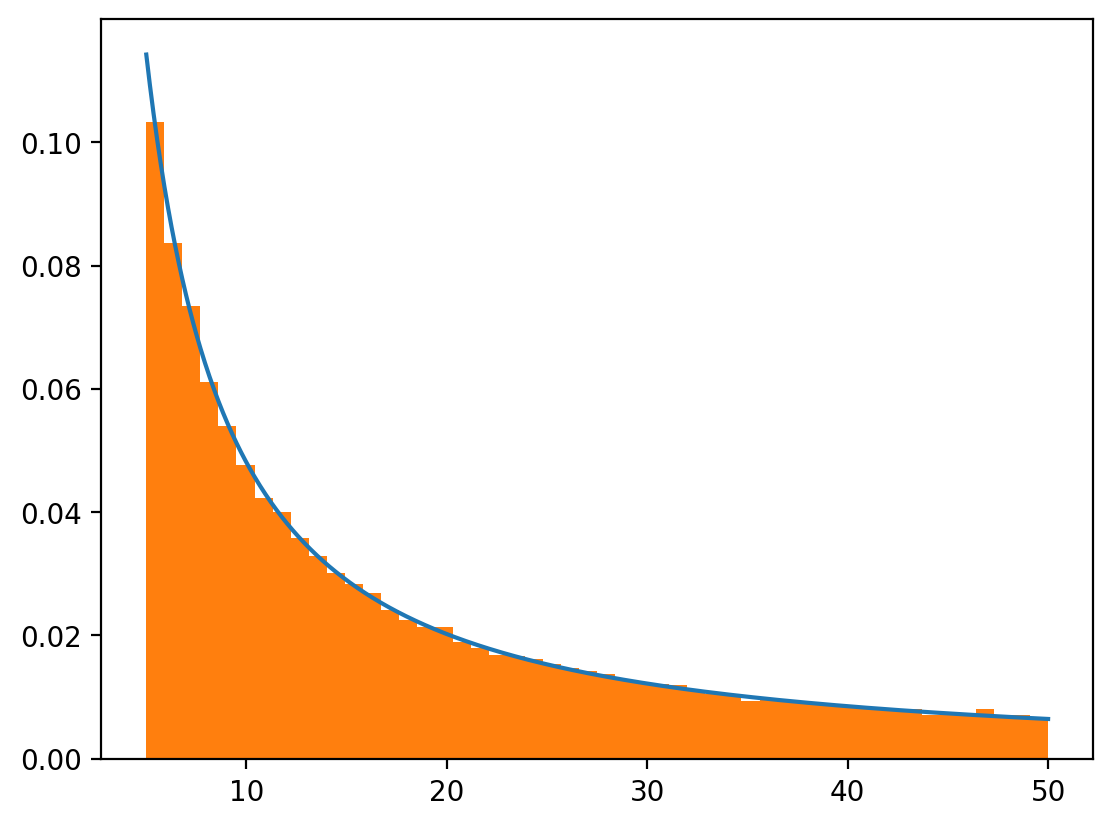

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import sympy

m = sympy.Symbol('m')
p = sympy.Symbol('p')
func = m**(-1.25)
norm = sympy.integrate(func, (m, 5, 50))
pdf = (1/norm)*m**(-1.25)


cdf = sympy.integrate(pdf,(m,5,m))

quantile = sympy.solvers.solve(cdf-p,m)

pdf = sympy.lambdify(m,pdf)
cdf = sympy.lambdify(m,cdf)
quantile = sympy.lambdify(p,quantile)

plt.plot(np.linspace(5,50,1000),pdf(np.linspace(5,50,1000)))

u = np.random.random(100000)
mdist = quantile(u)
plt.hist(mdist,bins=50,density=True)
plt.show()

In [6]:
m = sympy.Symbol('m',positive=True)
p = sympy.Symbol('p',positive=True)

func = m**(-(1.35))

norm = sympy.integrate(func, (m, 5, 50))
        
pdf = (1/norm)*m**(-(1.35))

cdf = sympy.integrate(pdf,(m,5,m))

        
quantile = sympy.solve(cdf-p,m)
try:
    quantile = sympy.lambdify(p,quantile[0])
except:
    quantile = sympy.lambdify(p,quantile)
print(quantile(0.01))

5.079896318680909


## Black hole object making!

In [84]:
import sys
sys.path.append('.')
from BBH_kick_sim import Simulator

In [85]:
params = {'cluster_mass':1e6,'imf_alpha':2.25,'radius':0.5,'rand_spin_type':'zero'}
test = Simulator.Simulator(params,print_missing=True)

'min_bh_star' not set, defaulting to 10
'bh_mass_frac' not set, defaulting to 0.5
'min_star' not set, defaulting to 0.8
'max_star' not set, defaulting to 100
'vel_thresh' not set, defaulting to 0.1
Setting up analytic mass distribution. This may take a while depending on your imf alpha
Done
Loaded NRSur7dq4Remnant fit.
Loaded NRSur3dq8Remnant fit.
Setup complete, Globular Cluster now has 14321 black holes.


In [86]:
test.begin_sim()

No stop time specified, Running until 1 or 0 black holes remain
14321/14321 remaining
12973/14321 remaining
11653/14321 remaining
10353/14321 remaining
9051/14321 remaining
7767/14321 remaining
6487/14321 remaining
5241/14321 remaining
3990/14321 remaining
Large mass ratio encountered: q=6.790740841904625
Large mass ratio encountered: q=9.508387146170978
Large mass ratio encountered: q=8.45651523327625
Large mass ratio encountered: q=7.376423492070064


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=6.02106933996991
Large mass ratio encountered: q=9.507271524226331


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=8.372394251373313
Large mass ratio encountered: q=6.749118524990737


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=6.703921829090176
Large mass ratio encountered: q=6.001394356078691
Large mass ratio encountered: q=6.31642313483322
Large mass ratio encountered: q=6.524096375114768
Large mass ratio encountered: q=8.174962356625544
Large mass ratio encountered: q=6.183714530096505
Large mass ratio encountered: q=6.525262025113389


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=6.210121990668383
Large mass ratio encountered: q=7.020484695153162
Large mass ratio encountered: q=6.329478941161234


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=6.663344847755866
Large mass ratio encountered: q=7.037293581141968
Large mass ratio encountered: q=7.288592935519054


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=6.09153449450254
Large mass ratio encountered: q=6.700063866094593
Large mass ratio encountered: q=6.56427633357193


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=8.155484632666646
Large mass ratio encountered: q=6.560420553524347
Large mass ratio encountered: q=8.669226408839515


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')


Large mass ratio encountered: q=7.285418481645225


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=6.608937276398972
Large mass ratio encountered: q=6.863446542843664
Large mass ratio encountered: q=9.245306081065166


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=6.610021588681183
Large mass ratio encountered: q=8.331669813789036
Large mass ratio encountered: q=6.995302518624123
2272/14321 remaining


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=6.122636636419671
Large mass ratio encountered: q=6.99717429180961
Large mass ratio encountered: q=6.407220005221336
Large mass ratio encountered: q=7.457334631857504


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=6.111897491977666


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=7.361964664176308
Large mass ratio encountered: q=6.121575661526695
Large mass ratio encountered: q=6.625898572272579


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=7.180200563733638
Large mass ratio encountered: q=7.299933112209349
Large mass ratio encountered: q=6.299439040466199
Large mass ratio encountered: q=7.823469860590444


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')


Large mass ratio encountered: q=7.805577886083757
Large mass ratio encountered: q=6.510537963800731
Large mass ratio encountered: q=6.086009416600373


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')


Large mass ratio encountered: q=9.736759200334365
Large mass ratio encountered: q=6.881289817717751
Large mass ratio encountered: q=7.217058438856156
Large mass ratio encountered: q=6.240887383824141


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=8.769058126766431
Large mass ratio encountered: q=6.09522269200918
Large mass ratio encountered: q=7.892847635083364
Large mass ratio encountered: q=8.73949618958195


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=7.820795893735828
Large mass ratio encountered: q=8.4154319983592
Large mass ratio encountered: q=8.325610989693734


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=8.306746537278054
Large mass ratio encountered: q=9.460972541903276
Large mass ratio encountered: q=6.2686806299686975


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=7.572145794870407
Large mass ratio encountered: q=6.6307777303811575
Large mass ratio encountered: q=6.762937333786348


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=8.205266698617194
Large mass ratio encountered: q=6.1720846934937965


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=6.963656127365193
Large mass ratio encountered: q=8.720300062525473


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=7.795335567792275
Large mass ratio encountered: q=6.328770166788094
Large mass ratio encountered: q=7.341889435854327
272/14321 remaining
Large mass ratio encountered: q=8.663619547615907
Large mass ratio encountered: q=7.423963856601181
Large mass ratio encountered: q=9.45596015502606


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=9.320588898183003
Large mass ratio encountered: q=7.0554821130282255
Large mass ratio encountered: q=8.455689608744294
Large mass ratio encountered: q=6.716948074591795


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training

Large mass ratio encountered: q=7.625896313818687
Finished. Total Simulation time: 75.983886616591
Total CPU time: 60.45955228805542


/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')
/Users/gersbaka/opt/anaconda3/envs/astro8020/lib/python3.10/site-packages/surfinBH/surfinBH.py:197: UserWarning: Mass ratio outside training range.
  warnings.warn('Mass ratio outside training range.')


In [87]:
print(len(test.GC.BHs),'in system, ejected:',len(test.GC.ejected))
allBHs = test.GC.BHs + test.GC.ejected
print(len(allBHs))

0 in system, ejected: 4185
4185


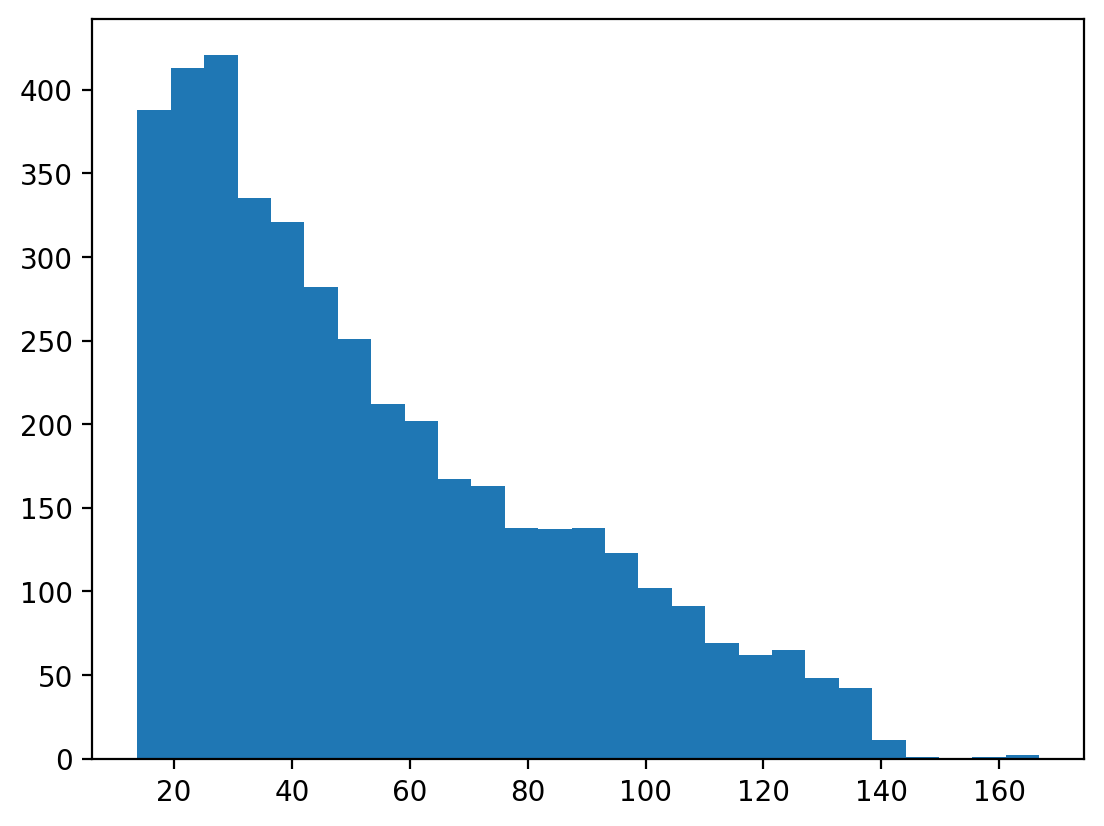

In [88]:
mall = [bh.m for bh in allBHs]
plt.hist(mall,bins='auto')
plt.show()

In [91]:
allBHs.sort(key=lambda b: -b.m)
for bh in allBHs:
    bh.printTree()

[M:166.772181,S_mag:0.575,v_mag:1141.997,v_imag:1141.997,t:23.24,t_i:23.24]
├── [M:91.338922,S_mag:0.471,v_mag:0.1,v_imag:0.313,t:23.24,t_i:0]
│   ├── [M:47.995732,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:47.99088,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:85.537262,S_mag:0.471,v_mag:0.1,v_imag:0.313,t:23.24,t_i:0]
    ├── [M:44.947143,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:44.942597,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:163.151197,S_mag:0.65,v_mag:1125.332,v_imag:1125.332,t:0.358,t_i:0.358]
├── [M:90.870864,S_mag:0.471,v_mag:0.1,v_imag:0.316,t:0.358,t_i:0]
│   ├── [M:47.750691,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:47.744046,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:83.30326,S_mag:0.471,v_mag:0.1,v_imag:0.316,t:0.358,t_i:0]
    ├── [M:43.774077,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:43.767986,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:158.669056,S_mag:0.658,v_mag:442.837,v_imag:442.837,t:54.718,t_i:54.718]
├

[M:106.21216,S_mag:0.612,v_mag:407.993,v_imag:407.993,t:15.552,t_i:15.552]
├── [M:75.68179,S_mag:0.471,v_mag:0.1,v_imag:0.314,t:15.552,t_i:0]
│   ├── [M:39.768664,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:39.764119,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:36.287464,S_mag:0.471,v_mag:0.1,v_imag:0.314,t:15.552,t_i:0]
    ├── [M:19.068046,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:19.065869,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:106.102952,S_mag:0.557,v_mag:310.607,v_imag:310.607,t:70.301,t_i:70.301]
├── [M:75.069713,S_mag:0.471,v_mag:0.1,v_imag:0.305,t:70.301,t_i:0]
│   ├── [M:39.445019,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:39.444543,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:36.324787,S_mag:0.471,v_mag:0.1,v_imag:0.305,t:70.301,t_i:0]
    ├── [M:19.086685,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:19.086453,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:106.097685,S_mag:0.263,v_mag:93.008,v_imag:93.008,t:45.899,t_i:45.899

[M:88.873445,S_mag:0.461,v_mag:192.035,v_imag:192.035,t:40.537,t_i:40.537]
├── [M:73.908305,S_mag:0.471,v_mag:0.1,v_imag:0.31,t:40.537,t_i:0]
│   ├── [M:38.835893,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:38.833163,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:17.50691,S_mag:0.471,v_mag:0.1,v_imag:0.31,t:40.537,t_i:0]
    ├── [M:9.19919,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:9.198542,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:88.850916,S_mag:0.529,v_mag:1092.391,v_imag:1092.391,t:75.951,t_i:75.951]
├── [M:58.554877,S_mag:0.471,v_mag:0.1,v_imag:0.304,t:75.951,t_i:0]
│   ├── [M:30.767194,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:30.767191,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:34.865554,S_mag:0.471,v_mag:0.1,v_imag:0.304,t:75.951,t_i:0]
    ├── [M:18.319828,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:18.319826,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:88.757722,S_mag:0.338,v_mag:168.494,v_imag:168.494,t:69.731,t_i:69.731]
├

[M:74.869943,S_mag:0.484,v_mag:793.348,v_imag:793.348,t:0,t_i:0]
├── [M:51.337944,S_mag:0.471,v_mag:0.1,v_imag:0.335,t:0,t_i:0]
│   ├── [M:26.979306,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:26.970916,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:26.965919,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:74.808725,S_mag:0.431,v_mag:598.214,v_imag:598.214,t:61.925,t_i:61.925]
├── [M:60.20563,S_mag:0.471,v_mag:0.1,v_imag:0.306,t:61.925,t_i:0]
│   ├── [M:31.63503,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:31.634105,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:16.955954,S_mag:0.471,v_mag:0.1,v_imag:0.306,t:61.925,t_i:0]
    ├── [M:8.909501,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:8.90924,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:74.727842,S_mag:0.581,v_mag:515.468,v_imag:515.468,t:0,t_i:0]
├── [M:51.560996,S_mag:0.471,v_mag:0.1,v_imag:0.323,t:0,t_i:0]
│   ├── [M:27.095117,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:27.089508,S_mag:0.0,v_mag

[M:62.85548,S_mag:0.501,v_mag:64.871,v_imag:64.871,t:53.528,t_i:53.528]
├── [M:52.460251,S_mag:0.471,v_mag:0.1,v_imag:0.308,t:53.528,t_i:0]
│   ├── [M:27.565451,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:27.564188,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:12.245083,S_mag:0.471,v_mag:0.1,v_imag:0.308,t:53.528,t_i:0]
    ├── [M:6.434228,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:6.433934,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:62.824891,S_mag:0.507,v_mag:104.02,v_imag:104.02,t:23.468,t_i:23.468]
├── [M:52.571739,S_mag:0.471,v_mag:0.1,v_imag:0.312,t:23.468,t_i:0]
│   ├── [M:27.624791,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:27.622009,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:12.139842,S_mag:0.471,v_mag:0.1,v_imag:0.313,t:23.468,t_i:0]
    ├── [M:6.379104,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:6.378461,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:62.712818,S_mag:0.604,v_mag:781.673,v_imag:781.673,t:46.611,t_i:46.611]
├── [M

[M:53.554125,S_mag:0.592,v_mag:331.682,v_imag:331.682,t:31.597,t_i:31.597]
├── [M:39.837338,S_mag:0.471,v_mag:0.1,v_imag:0.311,t:31.597,t_i:0]
│   ├── [M:20.933117,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:20.931305,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:16.336189,S_mag:0.471,v_mag:0.1,v_imag:0.311,t:31.597,t_i:0]
    ├── [M:8.584091,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:8.583349,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:53.536239,S_mag:0.314,v_mag:500.788,v_imag:500.788,t:67.309,t_i:67.309]
├── [M:44.143334,S_mag:0.471,v_mag:0.1,v_imag:0.305,t:67.309,t_i:0]
│   ├── [M:23.194975,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:23.194549,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:10.670955,S_mag:0.471,v_mag:0.1,v_imag:0.305,t:67.309,t_i:0]
    ├── [M:5.60702,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:5.606917,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:53.473739,S_mag:0.508,v_mag:364.451,v_imag:364.451,t:73.053,t_i:73.053]
├─

[M:45.957357,S_mag:0.517,v_mag:506.125,v_imag:506.125,t:31.739,t_i:31.739]
├── [M:33.708112,S_mag:0.471,v_mag:0.1,v_imag:0.311,t:31.739,t_i:0]
│   ├── [M:17.712421,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:17.710894,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:14.237647,S_mag:0.471,v_mag:0.1,v_imag:0.311,t:31.739,t_i:0]
    ├── [M:7.48138,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:7.480735,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:45.945464,S_mag:0.396,v_mag:396.846,v_imag:396.846,t:71.442,t_i:71.442]
├── [M:35.654326,S_mag:0.471,v_mag:0.1,v_imag:0.305,t:71.442,t_i:0]
│   ├── [M:18.734372,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:18.73419,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:11.770838,S_mag:0.471,v_mag:0.1,v_imag:0.305,t:71.442,t_i:0]
    ├── [M:6.184923,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:6.184863,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:45.927948,S_mag:0.446,v_mag:616.085,v_imag:616.085,t:63.908,t_i:63.908]
├──

[M:39.188542,S_mag:0.549,v_mag:345.607,v_imag:345.607,t:4.04,t_i:4.04]
├── [M:29.828362,S_mag:0.471,v_mag:0.1,v_imag:0.316,t:4.04,t_i:0]
│   ├── [M:15.674118,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:15.67203,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:11.052302,S_mag:0.471,v_mag:0.1,v_imag:0.316,t:4.04,t_i:0]
    ├── [M:5.80773,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:5.806957,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:39.176922,S_mag:0.595,v_mag:62.294,v_imag:62.294,t:0,t_i:0]
├── [M:27.058836,S_mag:0.471,v_mag:0.1,v_imag:0.324,t:0,t_i:0]
│   ├── [M:14.219367,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:14.216331,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:14.211855,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:39.176303,S_mag:0.57,v_mag:599.456,v_imag:599.456,t:0,t_i:0]
├── [M:27.004095,S_mag:0.471,v_mag:0.1,v_imag:0.329,t:0,t_i:0]
│   ├── [M:14.190918,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:14.187252,S_mag:0.0,v_mag:0.0,v_ima

[M:33.034844,S_mag:0.649,v_mag:66.553,v_imag:66.553,t:59.355,t_i:59.355]
├── [M:22.003459,S_mag:0.471,v_mag:0.1,v_imag:0.307,t:59.355,t_i:0]
│   ├── [M:11.56174,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:11.561343,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:13.080136,S_mag:0.471,v_mag:0.1,v_imag:0.307,t:59.355,t_i:0]
    ├── [M:6.872971,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:6.872735,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:33.014658,S_mag:0.591,v_mag:113.165,v_imag:113.165,t:0,t_i:0]
├── [M:22.790844,S_mag:0.471,v_mag:0.1,v_imag:0.319,t:0,t_i:0]
│   ├── [M:11.976263,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:11.974271,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:11.973502,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:33.010543,S_mag:0.567,v_mag:226.14,v_imag:226.14,t:41.142,t_i:41.142]
├── [M:22.954757,S_mag:0.471,v_mag:0.1,v_imag:0.31,t:41.142,t_i:0]
│   ├── [M:12.061811,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:12.060976,S_m

[M:27.690973,S_mag:0.601,v_mag:778.657,v_imag:778.657,t:51.258,t_i:51.258]
├── [M:15.204312,S_mag:0.471,v_mag:0.1,v_imag:0.308,t:51.258,t_i:0]
│   ├── [M:7.989185,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:7.988784,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:14.190178,S_mag:0.471,v_mag:0.1,v_imag:0.308,t:51.258,t_i:0]
    ├── [M:7.456302,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
    └── [M:7.455928,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:27.68599,S_mag:0.594,v_mag:112.564,v_imag:112.564,t:0,t_i:0]
├── [M:19.118576,S_mag:0.471,v_mag:0.1,v_imag:0.32,t:0,t_i:0]
│   ├── [M:10.046613,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:10.044792,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:10.044085,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:27.683403,S_mag:0.552,v_mag:389.316,v_imag:389.316,t:31.268,t_i:31.268]
├── [M:15.055336,S_mag:0.471,v_mag:0.1,v_imag:0.311,t:31.268,t_i:0]
│   ├── [M:7.91105,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:7.910362,S_ma

[M:22.944022,S_mag:0.549,v_mag:87.025,v_imag:87.025,t:0,t_i:0]
├── [M:15.786934,S_mag:0.471,v_mag:0.1,v_imag:0.324,t:0,t_i:0]
│   ├── [M:8.295994,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:8.294243,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:8.292925,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:22.936702,S_mag:0.524,v_mag:483.963,v_imag:483.963,t:0,t_i:0]
├── [M:15.761002,S_mag:0.471,v_mag:0.1,v_imag:0.424,t:0,t_i:0]
│   ├── [M:8.285212,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:8.27777,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:8.276269,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:22.922388,S_mag:0.651,v_mag:672.39,v_imag:672.39,t:43.91,t_i:43.91]
├── [M:12.362492,S_mag:0.471,v_mag:0.1,v_imag:0.309,t:43.91,t_i:0]
│   ├── [M:6.495981,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:6.495564,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:12.089101,S_mag:0.471,v_mag:0.1,v_imag:0.309,t:43.91,t_i:0]
    ├── [M:6.352325,S_mag:0.0,v_mag:0.0,v_imag:0.0,t

[M:17.271057,S_mag:0.584,v_mag:453.743,v_imag:453.743,t:0,t_i:0]
├── [M:11.917532,S_mag:0.471,v_mag:0.1,v_imag:0.334,t:0,t_i:0]
│   ├── [M:6.262919,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:6.261024,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:6.26091,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:17.241775,S_mag:0.596,v_mag:61.706,v_imag:61.706,t:0,t_i:0]
├── [M:11.907597,S_mag:0.471,v_mag:0.1,v_imag:0.317,t:0,t_i:0]
│   ├── [M:6.257219,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:6.256284,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:6.25572,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:17.240773,S_mag:0.593,v_mag:61.913,v_imag:61.913,t:0,t_i:0]
├── [M:11.90434,S_mag:0.471,v_mag:0.1,v_imag:0.323,t:0,t_i:0]
│   ├── [M:6.255679,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
│   └── [M:6.254402,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]
└── [M:6.253924,S_mag:0.0,v_mag:0.0,v_imag:0.0,t:0,t_i:0]

[M:17.230925,S_mag:0.563,v_mag:591.575,v_imag:591.575,t:0,t_i:0]
├── [M:11